**Image Reproduction:** Here we demonstrate a genetic algorithm that attempts to recreate an image. This is a long running algorithm!

C:\Users\johnm\AppData\Local\Temp\ipykernel_18284\1926386444.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  target_im = imageio.imread('upland.jpg')


Fitness value of the best solution = 43693.24020826476
Index of the best solution : 0


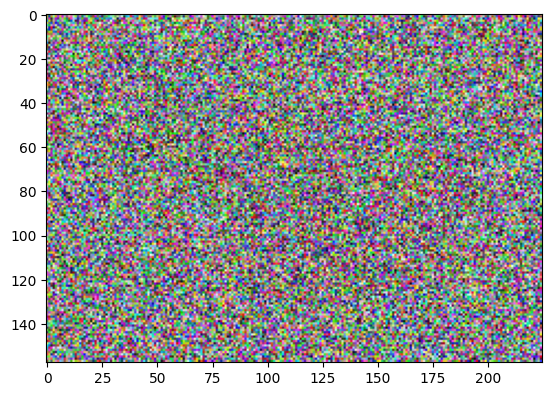

In [6]:
import pygad
import numpy
import matplotlib.pyplot
import imageio
import numpy
import functools
import operator

target_im = imageio.imread('upland.jpg')
target_im = numpy.asarray(target_im/255, dtype=float)

def img2chromosome(img_arr):

    return numpy.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))

def chromosome2img(vector, shape):
    # Check if the vector can be reshaped according to the specified shape.
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("A vector of length {vector_length} into an array of shape {shape}.".format(vector_length=len(vector), shape=shape))

    return numpy.reshape(a=vector, newshape=shape)

target_chromosome = img2chromosome(target_im)

def fitness_fun(gainstance,solution, solution_idx):
    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness


ga_instance = pygad.GA(num_generations=857,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

result = chromosome2img(solution, target_im.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.show()